In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('bank_additional_full_prep.csv',delimiter=';', decimal=',')
df.head()

,age,job,marital,education,housing_loan,personal_loan,contact,contact_month,contact_day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,no


In [3]:
from sklearn import preprocessing
num = preprocessing.LabelEncoder()

num.fit(["admin.","blue-collar","entrepreneur","housemaid","management",
         "retired","self-employed","services","student","technician","unemployed","unknown"])
df['job']=num.transform(df['job']).astype('int')

num.fit(["divorced","married","single","unknown"])
df['marital']=num.transform(df['marital']).astype('int')

num.fit(["basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown"])
df['education']=num.transform(df['education']).astype('int')

num.fit(["no","yes","unknown"])
df['housing_loan']=num.transform(df['housing_loan']).astype('int')

num.fit(["no","yes","unknown"])
df['personal_loan']=num.transform(df['personal_loan']).astype('int')

num.fit(["failure","nonexistent","success"])
df['poutcome']=num.transform(df['poutcome']).astype('int')

num.fit(["yes","no"])
df['y']=num.transform(df['y']).astype('int')

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df['cons.price.idx'] = scaler.fit_transform(df[['cons.price.idx']]).reshape(-1,1)
df['cons.conf.idx'] = scaler.fit_transform(df[['cons.conf.idx']]).reshape(-1,1)
df['euribor3m'] = scaler.fit_transform(df[['euribor3m']]).reshape(-1,1)

In [5]:
X = np.asarray(df[['age', 'job', 'marital', 'education', 'housing_loan',
                   'emp.var.rate', 'cons.conf.idx', 'euribor3m']])
y = np.asarray(df['y'])

In [6]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(ratio='auto', kind='regular')
X_sampled,y_sampled=sm.fit_sample(X,y)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled,test_size=0.3,random_state=0)

In [8]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(C=1, solver='lbfgs')
clf = SVC(kernel='rbf', gamma='auto')
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
rfc = RandomForestClassifier(n_estimators=40)

In [9]:
def scorer(i,j,k,l):
    for classifier in (i,j,k,l):
        classifier.fit(X_train,y_train)
        print (classifier.__class__.__name__, 'F1 score =', f1_score(y_test,classifier.predict(X_test)))
scorer (lr,clf,dtree,rfc)

LogisticRegression F1 score = 0.7180493273542602
DecisionTreeClassifier F1 score = 0.7093983920155255
RandomForestClassifier F1 score = 0.9246273553951437


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train,y_train)
yhat1=neigh.predict(X_test)
print(f1_score(y_test,yhat1,average='weighted'))

In [11]:
from sklearn.metrics import classification_report
yhat = rfc.predict(X_test)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     10594
           1       0.93      0.92      0.92     10757

   micro avg       0.92      0.92      0.92     21351
   macro avg       0.92      0.92      0.92     21351
weighted avg       0.92      0.92      0.92     21351



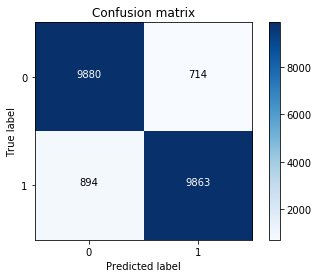

In [13]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_matrix(y_test, yhat), classes=['0','1'],normalize= False,  title='Confusion matrix')